<a href="https://colab.research.google.com/github/MiguelAngel-ht/Quantum-Computing/blob/main/Quantum_Circuit_and_Matrix_of_Circuits_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [ ]:
from google.colab import output     # clear output when is not necessary

In [ ]:
!pip install qiskit                   
!pip install qiskit[visualization]   # Qiskit to parameter "mpl" works
output.clear()

In [ ]:
from qiskit import QuantumCircuit, execute, Aer # Designe QC, execute and use local simulator
from qiskit.visualization import array_to_latex # Array to Latex
from qiskit.quantum_info import Operator # Circuit to Matrix
import numpy as np

# On computer algebra application tosimulation of quantum computation


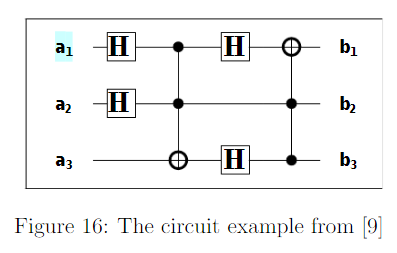

The equivalent circuit is designed in Qiskit:

In [14]:
# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Put gates
qc.h(1)
qc.h(2)
qc.ccx(2,1,0) # https://qiskit.org/textbook/ch-gates/more-circuit-identities.html#4.-The-Toffoli-
qc.h(0)
qc.h(2)
qc.ccx(0,1,2)
output.clear()

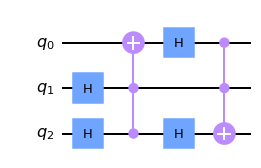

In [15]:
qc.draw('mpl')

Obtaining the matrix of circuit

In [16]:
op = Operator(qc)

In [17]:
matrix = op.data

This is the result

In [18]:
array_to_latex(matrix)

<IPython.core.display.Latex object>

Reference:

In [ ]:
# https://www.researchgate.net/publication/228564873_On_computer_algebra_application_to_simulation_of_quantum_computation

Another way to obtain this matrix

In [ ]:
backend = Aer.get_backend('unitary_simulator') # use Local Simulator

In [ ]:
job = execute(qc, backend) # Execution of circuit
result = job.result() # Get the result
array_to_latex(result.get_unitary(qc, decimals=3))  # Obtain Matrix from the result

<IPython.core.display.Latex object>

# *Chapter 7* 
## **Unitary Transforms and Quantum Gates**
*PROBLEMS AND SOLUTIONS IN QUANTUM COMPUTING AND QUANTUM INFORMATION 4th Edition*

*William Hans Steeb and Yorick Hardy*

#**Problem 2** 



*(a)* Let

$M := \frac{1}{\sqrt2} \begin{pmatrix} 1& i& 0& 0\\ 0& 0& i& 1\\ 0& 0& i& -1\\ 1& -i& 0& 0\end{pmatrix} $

Is the matrix $M$ unitary? In quantum computing $M$ is called the *magic
gate*.

*(b)* Let 

$U_H :=  \frac{1}{\sqrt{2}} \begin{pmatrix} 1&  1  \\ 1&  -1 \end{pmatrix}$,

$U_S := \begin{pmatrix} 1&  0  \\ 0&  i \end{pmatrix}$

and

$U_{CNOT2} := \begin{pmatrix} 1& 0& 0& 0\\ 0& 0& 0& 1\\ 0& 0& 1& 0\\ 0& 1& 0& 0\end{pmatrix} $

Show that the matrix $M$ can be written as

$M = U_{CNOT2}(I_2 ⊗ U_H)(U_S ⊗ U_S).$

----

**Solution** 

**(b)** First we create a equivalent circuit without $U_{CNOT2}$

In [25]:
# Create a quantum circuit
qc = QuantumCircuit(2)

# ADD QUANTUM GATES
qc.s(0)
qc.s(1)
qc.h(0)
qc.cx(0,1)
output.clear()

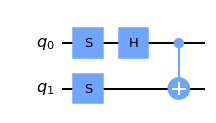

In [26]:
qc.draw('mpl')

Obtaining matrix of the quantum circuit

In [29]:
M = Operator(qc).data   # Circuit to Matrix and to numpy array

Result of operation

In [30]:
array_to_latex(M)

<IPython.core.display.Latex object>

The result is equal of *Magic Gate*.

**(a)** Now, we verify if this matrix is unitary computing 
$M M^{-1}$

In [31]:
# np.matrix is to calculate the inverse with the method .I
array_to_latex(np.matrix(M).I @ M)     

<IPython.core.display.Latex object>

The result is $M M^{-1} = I_4$, then is unitary.